# Conhecendo os dados

O objetivo desse notebook é fazer uma análise exploratória na base de dados [Dinheiro em circulação – v1.0](https://dados.gov.br/dataset/dinheiro-em-circulacao) do [BACEN](https://www.bcb.gov.br/), que representa o meio circulante nacional.

## O que é o **Meio circulante?**

As cédulas e moedas metálicas (inclusive as comemorativas) do padrão monetário Real, que estão em poder do público e da rede bancária, constituem o meio circulante nacional.

Diariamente, são feitas movimentações que alteram a **quantidade** e **composição** do numerário em circulação. O presente conjunto de dados tem por objetivo apresentar as quantidades diárias por Valor da Denominação (valor de face) e Família (espécie e categoria).

# Preparando o ambiente

O primeiro passo é baixar a base de dados. Trata-se de arquivo CSV contendo informações de meio circulante compreendidas de 02/01/1995 a 07/10/2022.

In [ ]:
# Upload do arquivo (renomei como mecir.csv), após baixá-lo no endereço acima.
from google.colab import files
arq = files.upload()

Saving mecir.csv to mecir.csv


In [ ]:
# Importando as bibliotecas que serão utilizadas.
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")


In [ ]:
# Configurando a visualização de casas decimais.
pd.options.display.float_format = '{:.2f}'.format


In [ ]:
# Criando nosso DataFrame
# Com o arquivo importado, vamos salvar em uma variável para podermos trabalhar com os dados.
df = pd.read_csv("mecir.csv")

Agora que o arquivo está disponível no ambiente, podemos começar a análise.

# Primeiras análises

In [ ]:
# Visualizando as 5 primeiras linhas.
df.head()


,02/01/1995;Moedas - 1a. Família (inox);0,01;834342314
0,02/01/1995;Moedas - 1a. Família (inox);0,05;636711876
1,02/01/1995;Moedas - 1a. Família (inox);0,1;583076666
2,02/01/1995;Moedas - 1a. Família (inox);0,25;146883388
3,02/01/1995;Moedas - 1a. Família (inox);0,5;329791540
4,02/01/1995;Cédulas - 1a. família;1;276894464,NaN


Como já dissemos, os dados a serem analizados estão em um arquivo CSV. Um arquivo CSV contém uma classificação tabular de dados em que cada linha contém valores separados por vírgula. Ao executar o código acima, percebemos que o arquivo de dados estava separado, na verdade, por ponto e vírgula (;). Precisamos refazer a leitura do nosso arquivo, alterando alguns parâmetros Já que o padrão do read_csv é considerar a vírgula (,) como separador de colunas e também não há cabeçalho no arquivo de dados, precisamos refazer a leitura do arquivo para o dataframe, informando essas características de nosso arquivo.

In [ ]:

df = pd.read_csv("mecir.csv",
                 # A linha abaixo informa qual o separador de colunas no arquivo
                 sep=";",

                 # Informa qual o separador de casas decimais.
                 decimal = ",",

                 # Inclui cabeçalhos nas colunas
                 names=["data","familia","denominacao","quantidade"],

                 # Informa qual o tipo de dados em cada coluna
                 dtype={"data":object,"familia":object,"denominacao":float,"quantidade":int}
                 )

# Perceba que no último parâmetro, dissemos que a coluna data é 'object', ao invés de 'datetime'.
# Fizemos isso, propositalmente, para convertermos posteriormente e de maneira mais refinada.


In [ ]:
# Visualizando as 5 primeiras linhas.

df.head()

,data,familia,denominacao,quantidade
0,02/01/1995,Moedas - 1a. Família (inox),0.01,834342314
1,02/01/1995,Moedas - 1a. Família (inox),0.05,636711876
2,02/01/1995,Moedas - 1a. Família (inox),0.10,583076666
3,02/01/1995,Moedas - 1a. Família (inox),0.25,146883388
4,02/01/1995,Moedas - 1a. Família (inox),0.50,329791540


In [ ]:
# Visualizando as 5 últimas linhas.

df.tail()

,data,familia,denominacao,quantidade
424863,07/10/2022,Cédulas - 1a. família,50.00,55308972
424864,07/10/2022,Cédulas - 2a. família,50.00,1800171017
424865,07/10/2022,Cédulas - 1a. família,100.00,13474920
424866,07/10/2022,Cédulas - 2a. família,100.00,1739479820
424867,07/10/2022,Cédulas - 2a. família,200.00,110924844


In [ ]:
# Consultando a quantidade de linhas e colunas.
df.shape

(424868, 4)

Uma coisa muito importante de saber é o tipo de dados usados num dataframe. Esse conhecimento é importante porque é o tipo de dado que determina quais operações são possíveis de serem realizadas com nosso dataframe. Após a criação do dataframe podemos saber quais são os tipos de dados armazenados em cada coluna. Vamos verificar quais os tipos de dados de nosso dataframe.

In [ ]:
# Verificando os tipos de dados do dataframe.
df.dtypes

data            object
familia         object
denominacao    float64
quantidade       int64
dtype: object

Percebe-se que a coluna Data está classificada como tipo `objetc`, conforme especificamos [acima](https://colab.research.google.com/drive/1z-zBDQqiIOZ---0ClHNKlhIUJWwPSJnw#scrollTo=YYQaj7CiF45R&line=8&uniqifier=1). Precisamos alterar para o tipo correto, a fim de que possamos fazer as análises adequadas a cada tipo.

In [ ]:
# Vamos ver novamente as primeiras linhas, para efeito de comparação.

df.head()

,data,familia,denominacao,quantidade
0,02/01/1995,Moedas - 1a. Família (inox),0.01,834342314
1,02/01/1995,Moedas - 1a. Família (inox),0.05,636711876
2,02/01/1995,Moedas - 1a. Família (inox),0.10,583076666
3,02/01/1995,Moedas - 1a. Família (inox),0.25,146883388
4,02/01/1995,Moedas - 1a. Família (inox),0.50,329791540


In [ ]:
# Alterando o tipo da coluna data para data, já com o formato que utilizamos no Brasil (dd/mm/aaaa).
df["data"] = pd.to_datetime(df["data"], format = "%d/%m/%Y")
df.dtypes

data           datetime64[ns]
familia                object
denominacao           float64
quantidade              int64
dtype: object

In [ ]:
# Agora vemos como ficou.

df.head()

,data,familia,denominacao,quantidade
0,1995-01-02,Moedas - 1a. Família (inox),0.01,834342314
1,1995-01-02,Moedas - 1a. Família (inox),0.05,636711876
2,1995-01-02,Moedas - 1a. Família (inox),0.10,583076666
3,1995-01-02,Moedas - 1a. Família (inox),0.25,146883388
4,1995-01-02,Moedas - 1a. Família (inox),0.50,329791540


In [73]:
# Verificando alguns dados de exemplo.

df.sample(10)

,data,familia,denominacao,quantidade,volume,ano,mes,dia
395047,2021-11-10,Moedas comemorativas Copa 2014 Cuproníquel (Pa...,2.00,19802,39604.00,2021,11,10
380755,2021-06-02,Moedas comemorativas Rio 2016 Prata (Chorinho),5.00,17500,87500.00,2021,6,2
203412,2015-10-02,Moedas - 1a. Família (inox),0.50,481821529,240910764.50,2015,10,2
264115,2017-09-26,Moedas comemorativas Copa 2014 Ouro,10.00,5000,50000.00,2017,9,26
344095,2020-04-13,Moedas comemorativas Rio 2016 Prata (Orquídea),5.00,18000,90000.00,2020,4,13
372225,2021-02-26,Moedas comemorativas duzentos anos da chegada ...,5.00,2000,10000.00,2021,2,26
258185,2017-07-20,Moedas comemorativas Ayrton Senna,2.00,10000,20000.00,2017,7,20
259311,2017-08-02,Moedas comemorativas Juscelino,2.00,10604,21208.00,2017,8,2
154585,2013-01-30,Moedas comemorativas Ary Barroso,20.00,1154,23080.00,2013,1,30
39961,2002-06-27,Moedas - 2a. Família,0.05,375851645,18792582.25,2002,6,27


In [ ]:
# Verificando a existência de dados faltantes.

df.isnull().sum()

data           0
familia        0
denominacao    0
quantidade     0
dtype: int64

Não há dados fantantes. Agora que nosso dataframe está pronto, podemos explorar os dados existentes.

# Explorando os dados

Vamos criar uma nova coluna demoninada 'volume' que será o resultado da multiplicação das colunas 'denominacao' e 'quantidade' e representa o montante em circulação da família representada em cada linha.

In [ ]:
# Criando a coluna volume.

df["volume"] = df["denominacao"].mul(df["quantidade"])
df.head()

,data,familia,denominacao,quantidade,volume
0,1995-01-02,Moedas - 1a. Família (inox),0.01,834342314,8343423.14
1,1995-01-02,Moedas - 1a. Família (inox),0.05,636711876,31835593.80
2,1995-01-02,Moedas - 1a. Família (inox),0.10,583076666,58307666.60
3,1995-01-02,Moedas - 1a. Família (inox),0.25,146883388,36720847.00
4,1995-01-02,Moedas - 1a. Família (inox),0.50,329791540,164895770.00


In [71]:
# Criando as colunas ano, mês e dia.

df["ano"] = df["data"].dt.year
df["mes"] = df["data"].dt.month
df["dia"] = df["data"].dt.day

In [ ]:
# Vamos consultar a média de volume por denominação/dia e agrupar por ano.

df.groupby("ano")["volume"].mean()

ano
1995    619136214.55
1996    748203359.88
1997    945390739.95
1998    888739892.78
1999    906167406.85
2000    999112227.64
2001   1084220802.15
2002   1247506178.16
2003   1178484902.90
2004   1247357158.03
2005   1437539793.36
2006   1683702923.27
2007   1913048830.52
2008   2176809327.68
2009   2400744616.58
2010   2728329422.37
2011   2836047826.74
2012   2978296499.14
2013   2985098220.60
2014   2731131598.42
2015   2048991479.10
2016   1702663062.43
2017   1745396301.66
2018   1853662301.79
2019   1936223488.54
2020   2484526222.37
2021   2660178603.35
2022   2518969785.46
Name: volume, dtype: float64

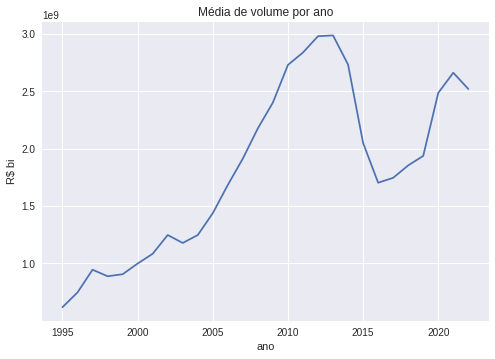

In [ ]:
# Agora vamos pegar a informação acima e plotar em um gráfico.

df.groupby("ano")["volume"].mean().plot(title="Média de volume por ano")
plt.xlabel("ano")
plt.ylabel("R$ bi");

O gráfico acima não representa a média do meio circulante, uma vez que o arquivo de dados contem todas as denominações existentes em cada data existente. Assim, o volume de uma data anterior estará contido no volume de uma data posterior.

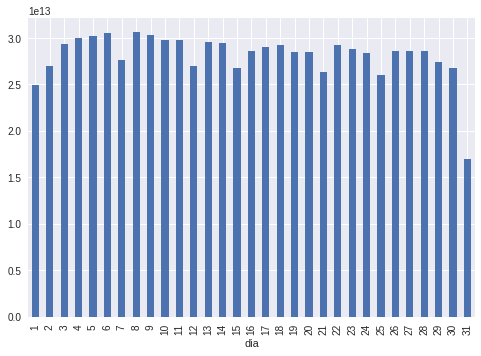

In [109]:
# Vamos consultar se algum dia do mês, costumamos ter mais volume em circulação.

df.groupby("dia")["volume"].sum().plot.bar();

Realmente, no final de cada mês a gente não costuma ter muita grana...

In [ ]:
# Vamos consultar quantas familias tempos em nossos dados.

len(df["familia"].unique())

102

Ao executarmos o código `len(df["familia"].unique())`, vemos que temos **102** famílias de numerários "em circulação", entre aspas pois a maior parte das famílias são moedas do tipo [comemorativas](https://www.bcb.gov.br/cedulasemoedas/moedascomemorativas). Esse tipo de moeda geralmente é produzida em pouca quantidade e na prática nem sempre fica, de fato, em circulação, mas é adquirida por colecionadores. Esse tipo de moeda possui quase sempre valor real maior que o valor de face (denominação). 

In [91]:
# Agora vamos saber qual a denominação que possui a maior quantidade quantidade.

df.loc[df["quantidade"]==df["quantidade"].max()]

,data,familia,denominacao,quantidade,volume,ano,mes,dia
424611,2022-10-06,Moedas - 2a. Família,0.10,6305713680,630571368.00,2022,10,6
424742,2022-10-07,Moedas - 2a. Família,0.10,6305713680,630571368.00,2022,10,7


In [116]:
# E para os numismatas de plantão, vamos saber qual a denominação mais rara que existe em nosso meio circulante.

df[df["quantidade"]!=0].min()

data                    1995-01-02 00:00:00
familia        Cartela Rio 2016 - Atletismo
denominacao                            0.01
quantidade                                3
volume                                 8.00
ano                                    1995
mes                                       1
dia                                       1
dtype: object

In [123]:
# Vamos verificar a quantidade média de cada denominação.

df.groupby("denominacao")["quantidade"].mean().sort_values(ascending=False)

denominacao
0.10     2111817187.58
0.05     1872636648.35
0.01     1495303644.19
0.25      883936754.30
50.00     822724152.07
0.50      797073171.27
100.00    313762311.29
10.00     167155426.91
1.00      156118845.28
200.00     75831731.38
2.00       61964682.94
20.00      53316544.60
5.00       29861188.30
3.00          12074.73
4.00           8847.82
Name: quantidade, dtype: float64

Isso explica o motivo de vermos com mais frequencia cédulas de R$ 50,00 e menos as demais... as moedas de 1, 5, 10 e 25 centavos, em que pese serem em maior quantidade, não as vemos tanto provavelmente por estarem em cofrinhos de porcelana ou... [garrafas PET](https://www.youtube.com/watch?v=d81lzvRE3NI)

In [ ]:
# Vamos saber qual a data mais antiga em nosso dataframe.

df["data"].min()

Timestamp('1995-01-02 00:00:00')

In [ ]:
# Vamos criar um novo dataframe somente com as informações dessa data.

df_menor_data = df.loc[(df["data"].dt.day == 2) & 
             (df["data"].dt.month == 1) &
             (df["data"].dt.year == 1995)]

In [ ]:
# Vamos consultar qual o volume total do meio circulante naquela data.

df_menor_data["volume"].sum()

9666301958.54

In [ ]:
# Vamos consultar qual a data mais recente em nosso dataframe.

df["data"].max()

Timestamp('2022-10-07 00:00:00')

In [ ]:
# Vamos criar um novo dataframe somente com as informações dessa data.

df_maior_data = df.loc[(df["data"].dt.day == 7) & 
             (df["data"].dt.month == 10) &
             (df["data"].dt.year == 2022)]

In [ ]:
# Vamos consultar qual o volume total do meio circulante naquela data.

df_maior_data["volume"].sum()

324652038874.18

In [ ]:
# Consultando as quantidades de cada denominação.
df_maior_data.groupby("denominacao")["quantidade"].sum()

denominacao
0.01      3191087458
0.05      7488447094
0.10      7706296804
0.25      3403114986
0.50      3451545200
1.00      4153502355
2.00      1520983294
3.00           25000
4.00            9000
5.00       645065021
10.00      581644432
20.00      720336650
50.00     1855479989
100.00    1752954740
200.00     110924844
Name: quantidade, dtype: int64

In [ ]:
# Plotando em um gráfico.

df_maior_data.groupby("denominacao")["quantidade"].sum().plot.barh(title="Quantidade existente x denominação")
plt.xlabel("quantidade")
plt.ylabel("denominação");

In [ ]:
# Diferença de montante entre a maior e a menor data.

df0 = pd.concat([df_menor_data,df_maior_data]).reset_index()
df0["ano"] = df0["data"].dt.year


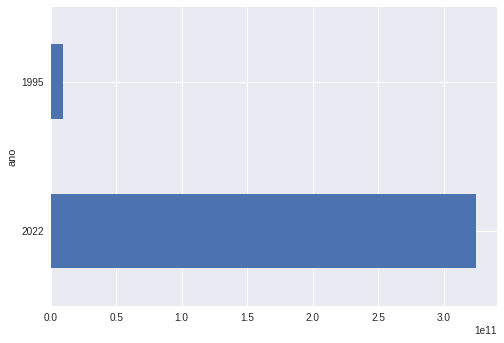

In [ ]:
# Visualizando a diferença.

df0.groupby("ano")["volume"].sum().sort_values(ascending=False).plot.barh()

# A cédula de R$ 200,00

![](https://conteudo.imguol.com.br/c/noticias/12/2020/09/02/2-familia-nota-de-r-200-1599069684338_v2_450x450.jpg)

No dia 02/09/2020 o Banco Central [lançou](https://agenciabrasil.ebc.com.br/economia/noticia/2020-09/cedula-de-r-200-entra-em-circulacao-hoje) a cédula de R$ 200,00 que está em circulação atualmente e representa a 7ª cédula da 2ª família do real. Vamos ver algumas informações sobre esta cédula.

In [110]:
# Vamos criar um dataframe somente com essas informações.

df200 = df.loc[(df["denominacao"] == 200.00)].reset_index()
df200

,index,data,familia,denominacao,quantidade,volume,ano,mes,dia
0,356796,2020-09-02,Cédulas - 2a. família,200.00,603995,120799000.00,2020,9,2
1,356925,2020-09-03,Cédulas - 2a. família,200.00,3279045,655809000.00,2020,9,3
2,357054,2020-09-04,Cédulas - 2a. família,200.00,4774598,954919600.00,2020,9,4
3,357183,2020-09-08,Cédulas - 2a. família,200.00,5943413,1188682600.00,2020,9,8
4,357312,2020-09-09,Cédulas - 2a. família,200.00,6358585,1271717000.00,2020,9,9
...,...,...,...,...,...,...,...,...,...
523,424343,2022-10-03,Cédulas - 2a. família,200.00,109105572,21821114400.00,2022,10,3
524,424474,2022-10-04,Cédulas - 2a. família,200.00,109593059,21918611800.00,2022,10,4
525,424605,2022-10-05,Cédulas - 2a. família,200.00,110372649,22074529800.00,2022,10,5
526,424736,2022-10-06,Cédulas - 2a. família,200.00,110924844,22184968800.00,2022,10,6


In [111]:
# Vamos verificar o volume médio diário das cédulas de R$ 200,00 por ano.

df200.groupby("ano")["volume"].mean().sort_values(ascending=True)

ano
2020    5260373713.25
2021   14558277572.11
2022   20191196624.74
Name: volume, dtype: float64

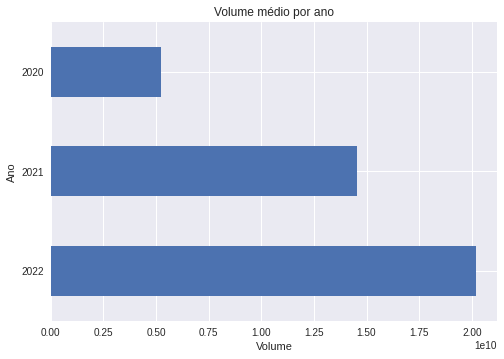

In [79]:
# Plotando as informações acima em um gráfico.

df200.groupby("ano")["volume"].mean().sort_values(ascending=False).plot.barh(title="Volume médio por ano")
plt.xlabel("Volume")
plt.ylabel("Ano");

Futuramente este conjunto de dados será descontinuado. Um novo conjunto de dados foi criado para substituí-lo: https://dadosabertos.bcb.gov.br/dataset/dinheiro-em-circulao